In [1]:
from PIL import Image
from IPython.display import display
import numpy as np
import os

In [2]:
ims = {f.split('.')[0]: Image.open('library/'+f) for f in os.listdir('library') if f.endswith('.png')}


In [3]:
basis = [
    ims['library1'], ims['library2'], ims['library3'],
    ims['4-7'], ims['10-7'],
]
basis.append(Image.blend(ims['2-3'], basis[3], -10))
basis.append(Image.blend(Image.blend(basis[0], ims['2-7'],1.5), basis[5], -5))
basis.append(Image.blend(Image.blend(ims['10-5'], basis[5], -0.7), basis[6], -1))
basis.append(Image.blend(Image.blend(ims['2-5'], basis[5], -0.7), basis[3], -0.8))
basis.append(Image.blend(ims['21-8'], basis[0], -1))
basis.append(Image.blend(Image.blend(Image.blend(Image.blend(Image.blend(ims['26-8'], basis[5], -0.21), basis[7], -0.8), basis[9], -0.33), basis[0], 0.04), basis[6], -0.25))
basis.append(Image.blend(ims['70-7'], basis[6],-1))
basis.append(Image.blend(ims['65-8'], basis[9],-5))

In [63]:
np.array(basis[0]).flatten()

array([255, 128,   0, ..., 128,   0, 255], dtype=uint8)

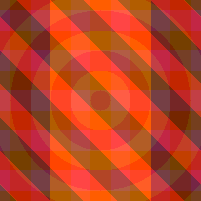

In [20]:
ims['41-8']

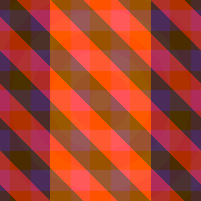

In [60]:
Image.blend(ims['41-8'], basis[0],-.3)

0


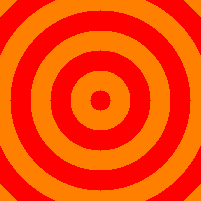

1


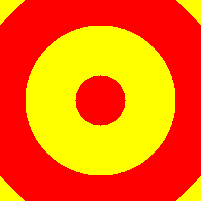

2


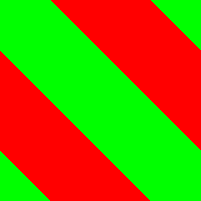

3


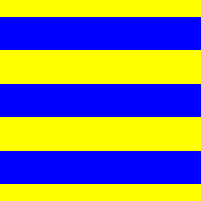

4


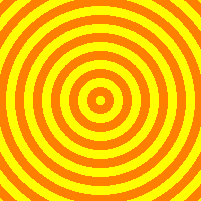

5


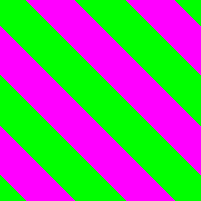

6


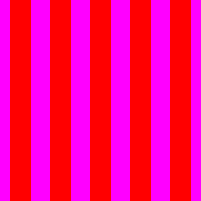

7


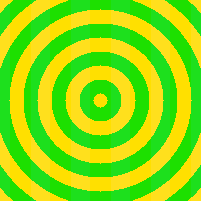

8


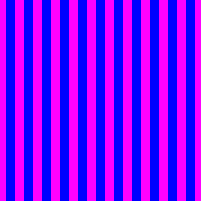

9


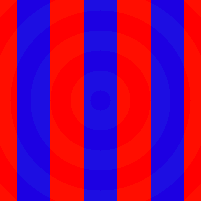

10


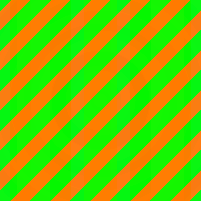

11


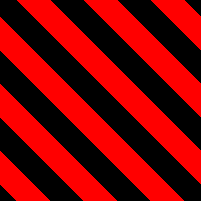

12


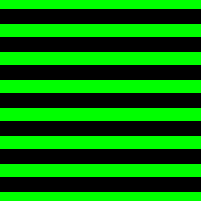

In [17]:
for i, im in enumerate(basis):
    print(i)
    display(im)

In [7]:
def to_array(img):
    return np.array(img).flatten()

In [14]:
def is_solved(im_key, basis):
    coefficients, residual, _, _ = np.linalg.lstsq(
        np.stack([to_array(im) for im in basis], axis=1), to_array(ims[im_key])
    )
    return np.abs(residual[0]) < 30000    

In [15]:
unsolved_ims = {key : im for key, im in ims.items() if not is_solved(key, basis)}

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
print(len(unsolved_ims), len(ims))

86 141


70-6


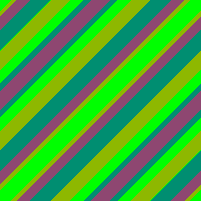

56-5


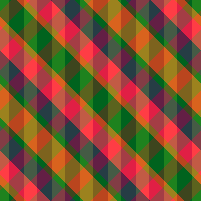

13-5


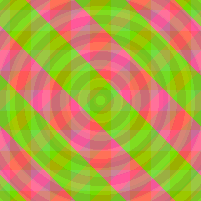

74-2


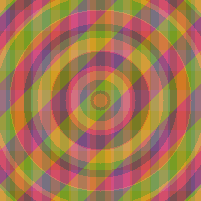

31-2


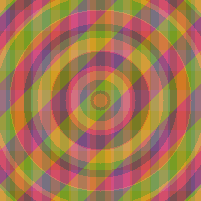

15-2


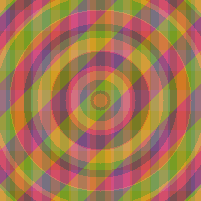

56-4


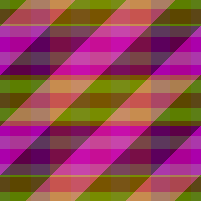

13-4


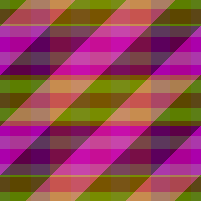

13-6


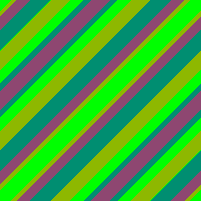

56-6


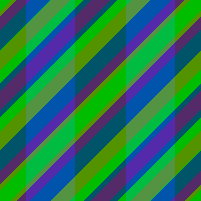

70-5


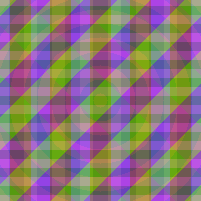

41-8


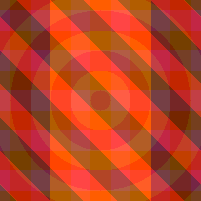

70-4


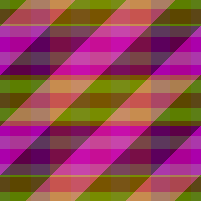

13-7


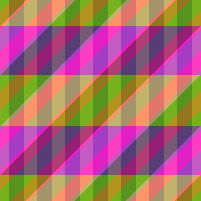

56-7


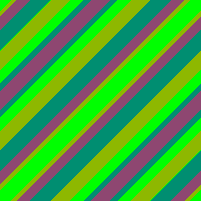

74-4


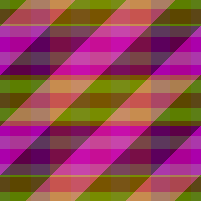

31-4


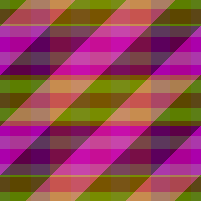

15-5


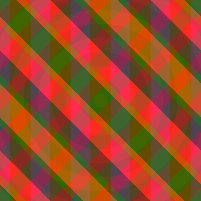

15-4


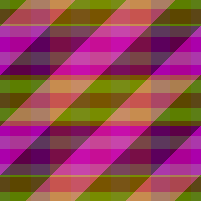

74-5


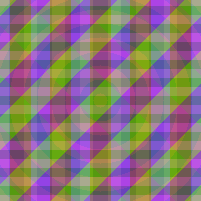

31-5


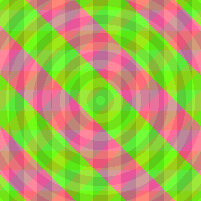

45-8


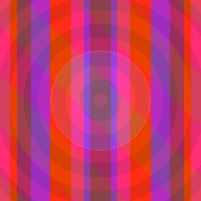

56-2


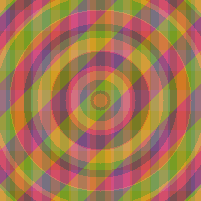

13-2


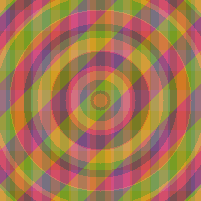

31-7


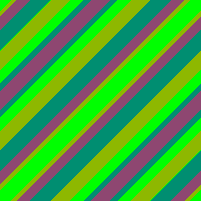

74-7


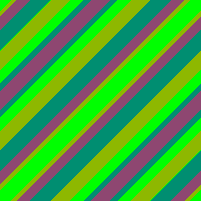

15-6


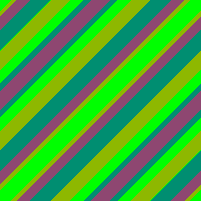

15-7


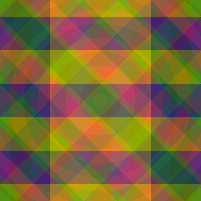

74-6


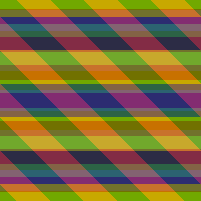

26-8


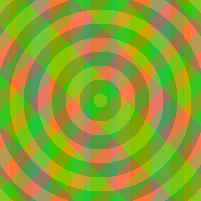

70-2


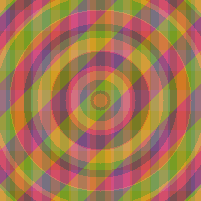

8-2


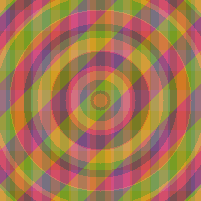

10-4


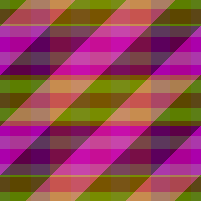

36-7


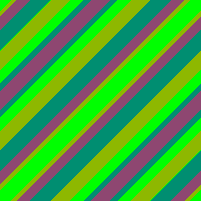

36-6


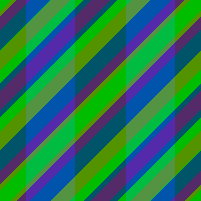

36-4


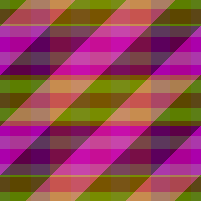

10-6


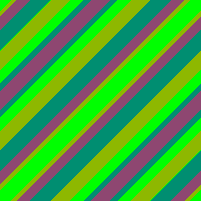

36-5


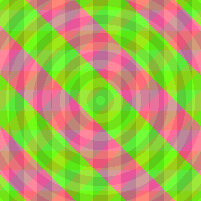

8-4


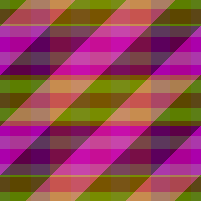

10-2


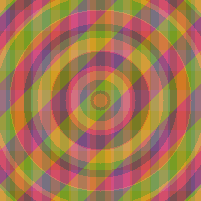

62-8


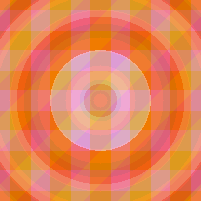

8-5


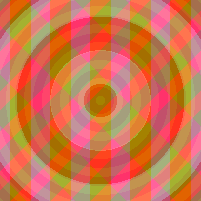

8-7


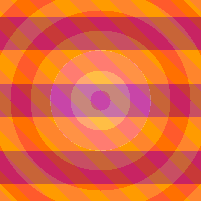

36-2


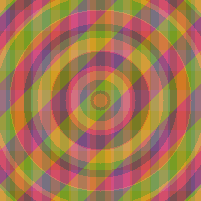

8-6


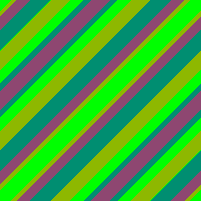

4-6


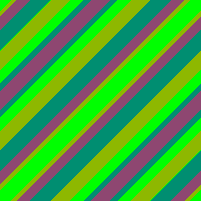

62-7


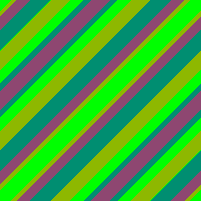

4-5


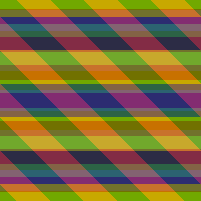

80-2


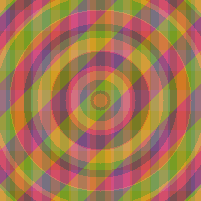

62-5


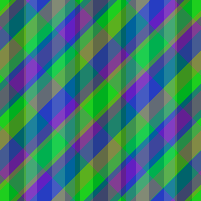

62-4


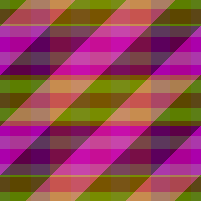

2-2


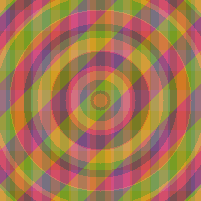

4-4


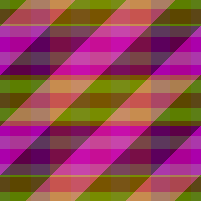

21-2


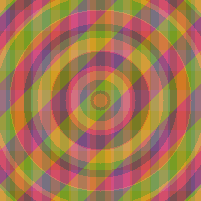

2-6


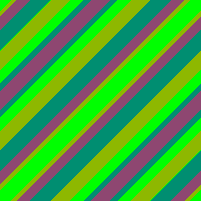

80-7


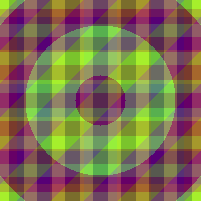

80-6


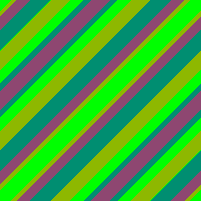

21-7


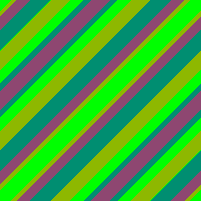

21-5


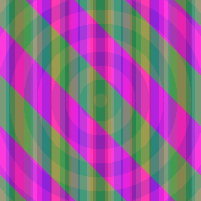

80-4


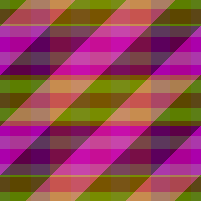

62-2


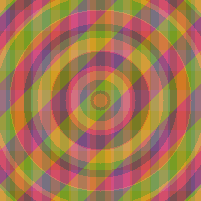

80-5


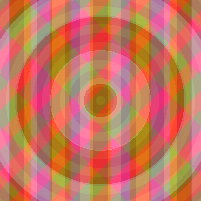

2-4


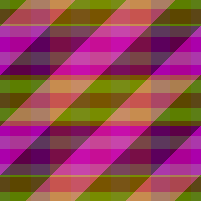

4-2


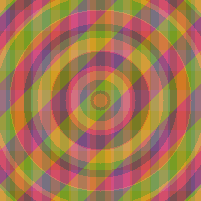

21-4


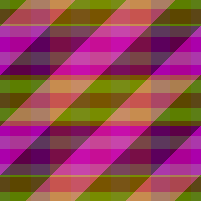

26-5


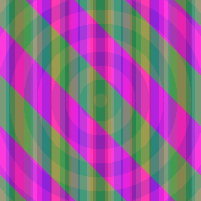

45-6


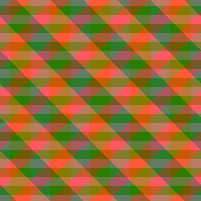

41-2


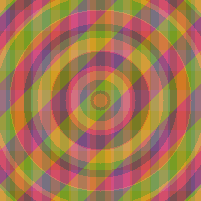

65-2


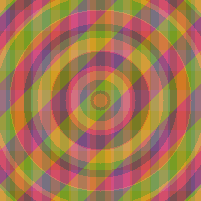

45-7


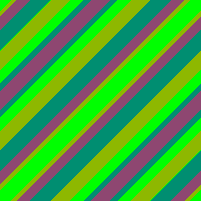

26-4


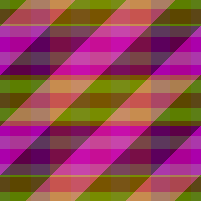

45-5


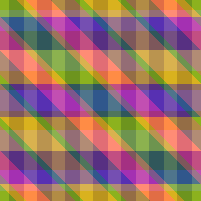

26-6


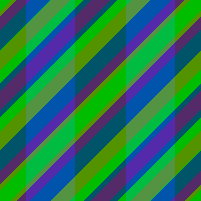

31-8


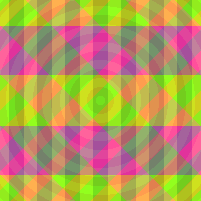

26-7


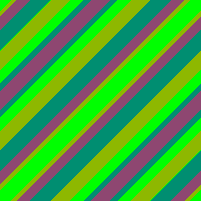

45-4


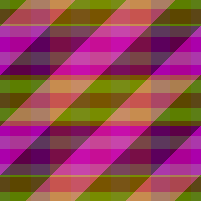

41-4


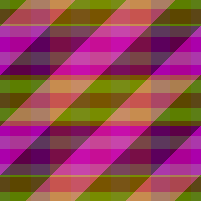

65-5


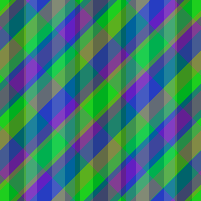

65-4


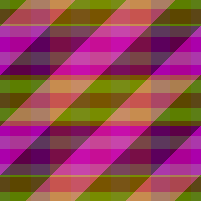

41-5


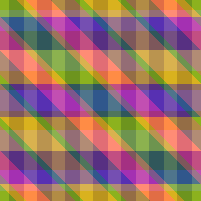

26-2


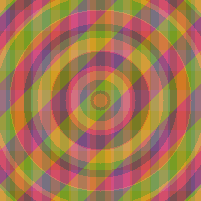

41-7


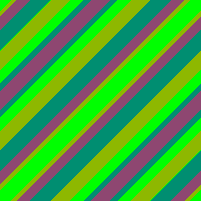

65-6


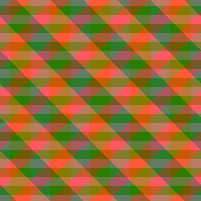

65-7


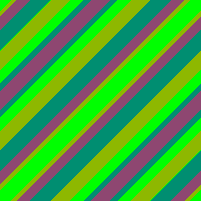

45-2


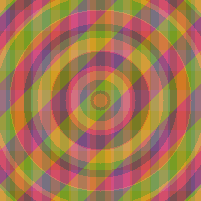

56-8


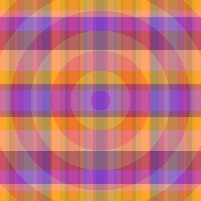

In [11]:
for key, im in unsolved_ims.items():
    print(key)
    display(im)

In [61]:
np.linalg.lstsq(np.stack([to_array(im) for im in basis], axis=1), to_array(ims["41-8"]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([0.20724545, 0.04912435, 0.00854148, 0.00689206, 0.10329618,
        0.0117269 , 0.11623743, 0.05141956, 0.03675061, 0.05287943,
        0.0340222 , 0.29839141, 0.02344718]),
 array([64616981.82416712]),
 13,
 array([236716.75690109,  72830.22824341,  58542.05507527,  44412.66525113,
         43071.85284654,  36762.31065526,  33618.71085238,  30039.40301415,
         27049.6790957 ,  25736.54217823,  24337.11450774,  19397.67988535,
         14617.42248005]))

In [13]:
is_solved("2-4", basis)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [65]:
for i in range(len(basis)):
    print(i)
    print(len({key : im for key, im in ims.items() if not is_solved(key, basis[:i] + basis[i+1:])}))

0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


91
1
87
2
88
3
112
4
106
5
126
6
112
7
92
8
89
9
88
10
86
11
87
12
87
